### Análise Exploratória - Conjunto de Dados de "Heart Failure"

Nesse notebook iremos explorar um pouco o conjunto de dados que escolhemos trabalhar, dado que queremos aplicar uma solução de classificação, isto é, um modelo supervisionado, vamos explorar o conjunto e tentar identificar quais variáveis podem contribuir para predizermos com uma precisão aceitável a probabilidade de insuficiência cardíaca. 

A ideia com esse modelo é utilizarmos sua imagem pós construção para criarmos uma aplicação que ficara chamando o modelo a cada 30 segundos e medirá por um tempo suas probabilidades, e qual a finalidade com isso?
Queremos utilizar posteriormente para visualizarmos a série temporal dessas probabilidades e, dessa forma, iremos monitorar com ainda mais precisão a sáude de um indivíduo de acordo com as suas características físicas, a fim de prevenirmos um possível acidente.

In [2]:
# Importando Libs:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# Importando Dataset:
df_heart = pd.read_csv(r"C:\Users\lucaa\Desktop\Pastas Gerais\Pós Tech Data Analytics\Tech Challenge\TechChallenge - Fase 3\techc_fase3_ml\data\raw\dataset_heart.csv", sep = ",")

In [4]:
print("Total de tuplas:", df_heart.shape)
df_heart.head()

Total de tuplas: (299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df_heart.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

O interessante é que todas as variáveis estão "de alguma forma" populadas, porém precisamos ver se não tem nenhum problema de inflacionamento de zeros por exemplo, que pode ser algo que deve ser tratado, caso contrário pode afetar nosso modelo.

### Visualizações

Vamos iniciar com algumas visualizações para podermos verificar quais variações podem ser interessantes dentro do modelo.

In [18]:
# Função para plotar variaveis numericas com a target:
def plot_boxplot(varx, nome):
    plt.figure(figsize=(10, 7))
    sns.boxplot(x = "DEATH_EVENT", y = varx, data = df_heart)
    plt.xlabel(xlabel= "Evento Insuficiência", color = "white")
    plt.ylabel(ylabel=nome, color = "white")
    plt.xticks(color='white')
    plt.yticks(color='white')
    plt.show()
    

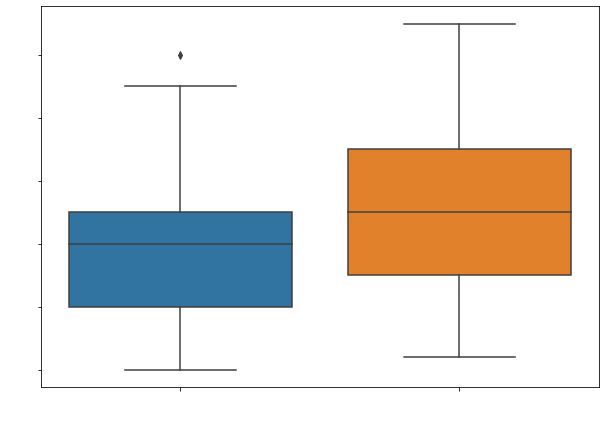

In [19]:
plot_boxplot(varx = "age", nome = "Idade")

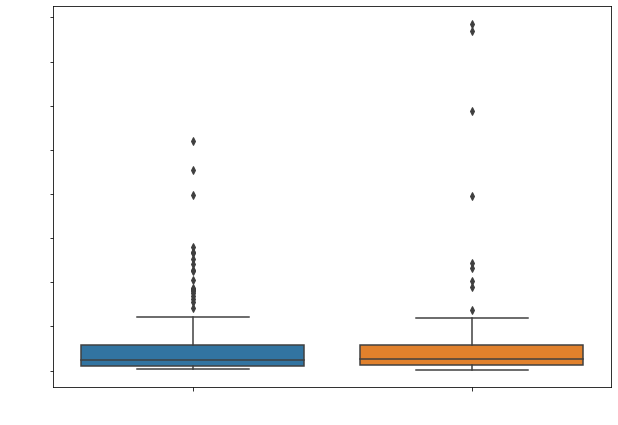

In [20]:
plot_boxplot(varx = "creatinine_phosphokinase", nome = "Idade")

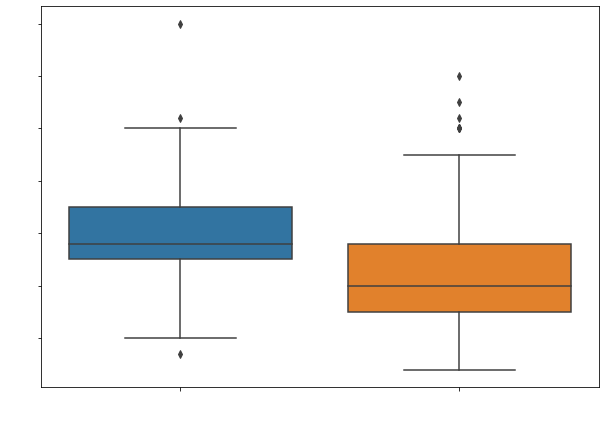

In [21]:
plot_boxplot(varx = "ejection_fraction", nome = "Idade")

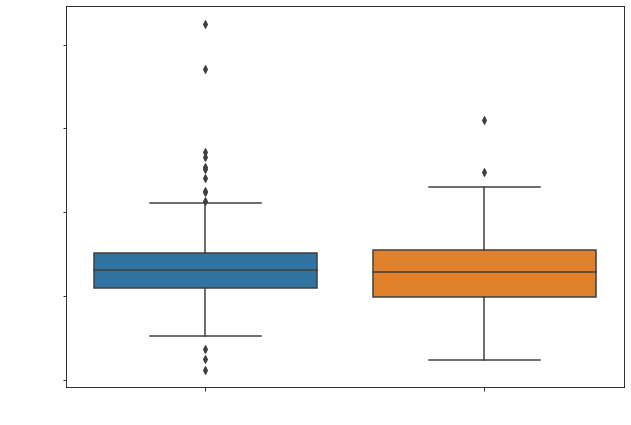

In [22]:
plot_boxplot(varx = "platelets", nome = "Idade")

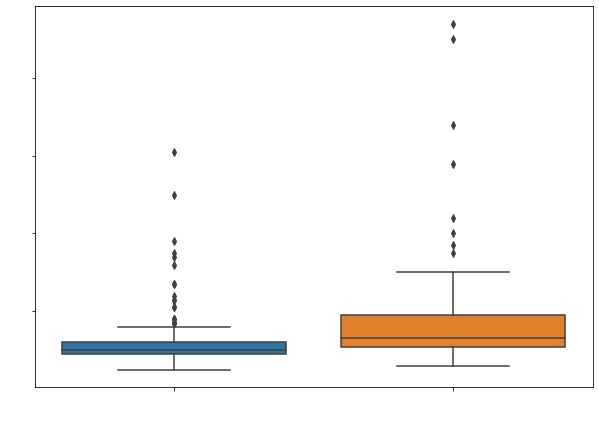

In [23]:
plot_boxplot(varx = "serum_creatinine", nome = "Idade")